This script, **loads a shapefile, transforms its coordinate reference system (CRS), samples a fraction of the data, plots the sampled data, and then saves the sampled data to a new shapefile.**

In [37]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [38]:
# Define constants
MAIN_CRS = 'EPSG:3857'
SAMPLE_FRAC = 1
RANDOM_STATE = 42
FILE_PATH = r"./osm_network/G_n.shp"
OUTPUT_PATH = './data/inlet.shp'

In [39]:
def set_env_var():
    os.environ['USE_PYGEOS'] = '0'

In [40]:
def load_and_transform_data(file_path, crs):
    # Load data
    data = gpd.read_file(file_path)
    # Transform CRS
    data = data.to_crs(crs)
    return data

In [41]:
def sample_data(data, frac, random_state):
    # Sample data
    sampled_data = data.sample(frac=frac, random_state=random_state).head(20)
    return sampled_data

In [42]:
def plot_data(data):
    # Plot data
    data.plot(color='red', alpha=0.5, edgecolor='k')
    plt.show()

In [43]:
def save_data(data, output_path):
    # Save data to file
    data.to_file(output_path)

In [44]:
def main():
    set_env_var()
    data = load_and_transform_data(FILE_PATH, MAIN_CRS)
    sampled_data = sample_data(data, SAMPLE_FRAC, RANDOM_STATE)
    plot_data(sampled_data)
    save_data(sampled_data, OUTPUT_PATH)

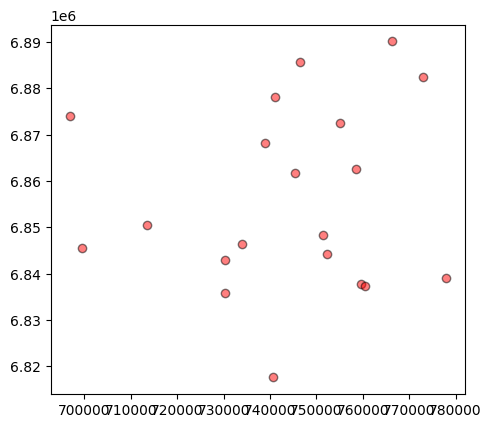

In [45]:
if __name__ == "__main__":
    main()